In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv('/Users/dylanbai/Desktop/Data Science/Assignments/midterm_data.csv')

In [4]:
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4


In [5]:
df.info() #we can see that the 'device' and 'location' columns have 100 and 30 missing data,roughly less than 10%.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


In [6]:
df.describe(include='all') 
# location has 5 unique values,with location 4 being the most frequently occurring location;
# device has 3 unique values, with Desktop being the most frequently used device;
# the median time_spent is 25.04 while the mean is 25.16
# the checkout status should be 0 or 1, the mean and std shouldn't be float.

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


In [7]:
df['checkout_status']=df['checkout_status'].astype(int)

In [8]:
# Converting 'checkout_status' to a categorical variable
df['checkout_status'] = df['checkout_status'].astype('category')

# Converting 'device' and 'location' to categorical variables
df['device'] = df['device'].astype('category')
df['location'] = df['location'].astype('category')

# Creating a new feature 'cart_value_per_item' to represent the average value of items in the cart
df['cart_value_per_item'] = df['cart_value'] / df['cart_items']

In [9]:
# since only the device and location column have missing values so we won't have the situation where the rows with all missing value.
# let's check situations where we have both device & location missing
df[df['device'].isnull() & df['location'].isnull()]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location,cart_value_per_item
2130,2131,20,5,21.841304,6,19,243.39,0,NaN,NaN,12.81


In [10]:
# the row above should be dropped.
df.drop([2130],axis=0,inplace=True)

In [11]:
# since the missing value is way more less than 10%, so we can drop all the rows caontaining missing value
df=df.dropna(subset=['device'])

In [12]:
df=df.dropna(subset=['location'])

In [13]:
#After checking the describe function, we see our medians, means, and modes have not changed. 
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location,cart_value_per_item
count,4871.000000,4871.00000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871.0,4871,4871,4871.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Desktop,Location 4,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3539.0,2522,1028,NaN
mean,2503.251488,41.53295,5.023609,25.172038,5.777458,14.971258,149.459444,NaN,NaN,NaN,9.985457
std,1445.707937,14.04452,2.589914,9.821864,2.566198,6.054916,68.811486,NaN,NaN,NaN,2.027535
min,1.000000,18.00000,1.000000,1.000000,1.000000,5.000000,20.410000,NaN,NaN,NaN,3.890909
25%,1251.500000,29.00000,3.000000,18.298029,4.000000,10.000000,92.415000,NaN,NaN,NaN,8.611833
50%,2505.000000,42.00000,5.000000,25.054759,6.000000,15.000000,143.020000,NaN,NaN,NaN,9.970952
75%,3760.500000,54.00000,7.000000,31.991099,8.000000,20.000000,198.550000,NaN,NaN,NaN,11.319212


<Axes: ylabel='time_spent'>

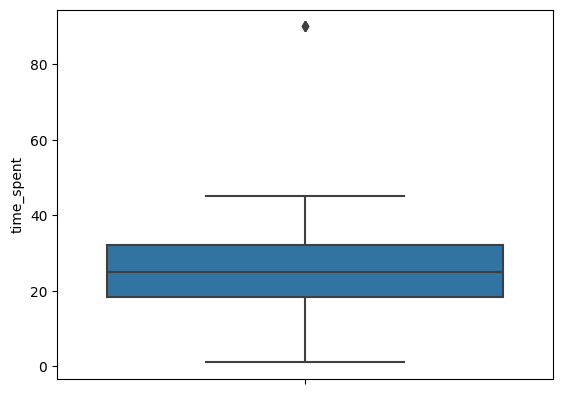

In [14]:
# let's see outliers ,it seems time_spent has one outlier
sns.boxplot(data=df,y='time_spent')

In [15]:
drop_time_outliers= df[df['time_spent']>80].index
drop_time_outliers

Index([284, 2494, 2833, 3957], dtype='int64')

In [16]:
df.drop(drop_time_outliers,inplace=True)

In [17]:
df.info() # 4 entries dropped.

<class 'pandas.core.frame.DataFrame'>
Index: 4867 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   userID               4867 non-null   int64   
 1   age                  4867 non-null   int64   
 2   sessions             4867 non-null   int64   
 3   time_spent           4867 non-null   float64 
 4   pages_visited        4867 non-null   int64   
 5   cart_items           4867 non-null   int64   
 6   cart_value           4867 non-null   float64 
 7   checkout_status      4867 non-null   category
 8   device               4867 non-null   category
 9   location             4867 non-null   category
 10  cart_value_per_item  4867 non-null   float64 
dtypes: category(3), float64(3), int64(5)
memory usage: 356.9 KB


<Axes: ylabel='cart_value'>

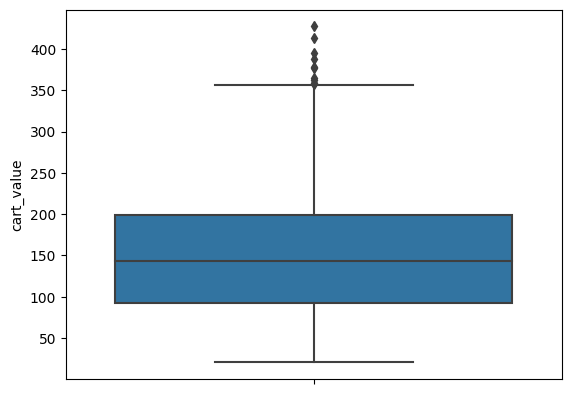

In [18]:
sns.boxplot(data=df,y='cart_value')

In [19]:
drop_value_outliers= df[df['cart_value']>350].index
drop_value_outliers

Index([166, 263, 301, 445, 604, 964, 1228, 1268, 1479, 2615, 2664, 2769, 3200,
       4557],
      dtype='int64')

In [20]:
df.drop(drop_value_outliers,inplace=True)

In [21]:
df.info() #14 entries dropped.

<class 'pandas.core.frame.DataFrame'>
Index: 4853 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   userID               4853 non-null   int64   
 1   age                  4853 non-null   int64   
 2   sessions             4853 non-null   int64   
 3   time_spent           4853 non-null   float64 
 4   pages_visited        4853 non-null   int64   
 5   cart_items           4853 non-null   int64   
 6   cart_value           4853 non-null   float64 
 7   checkout_status      4853 non-null   category
 8   device               4853 non-null   category
 9   location             4853 non-null   category
 10  cart_value_per_item  4853 non-null   float64 
dtypes: category(3), float64(3), int64(5)
memory usage: 355.9 KB


In [22]:
# time to do the data exploration
# Group by 'checkout_status' and calculate average values for each feature
checkout_rate= df['checkout_status'].mean()
print(checkout_rate)


TypeError: 'Categorical' with dtype category does not support reduction 'mean'

In [ ]:
import matplotlib.pyplot as plt

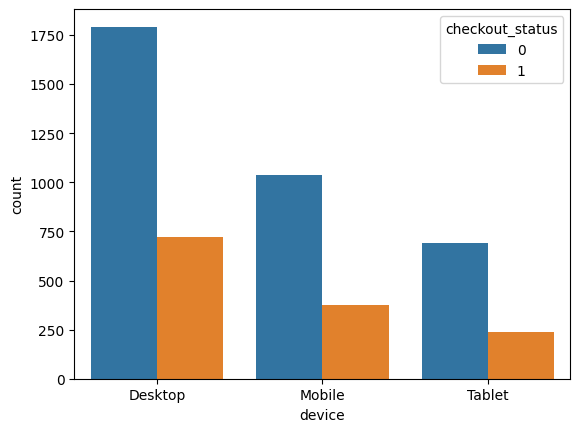

In [ ]:
# Comparing the checkout status by device type
sns.countplot(data=df, x='device', hue='checkout_status')
plt.show()

In [ ]:
# from above ,people using the desktop checkout most.

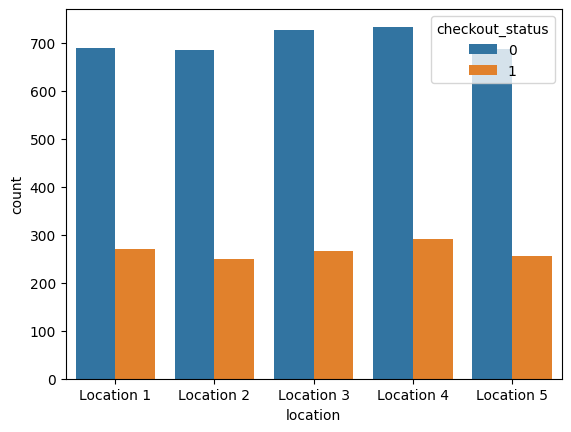

In [ ]:
# Comparing the checkout status by location
sns.countplot(data=df, x='location', hue='checkout_status')
plt.show()

In [ ]:
# from above,locations don't make siginificant different while location 4 checkout most

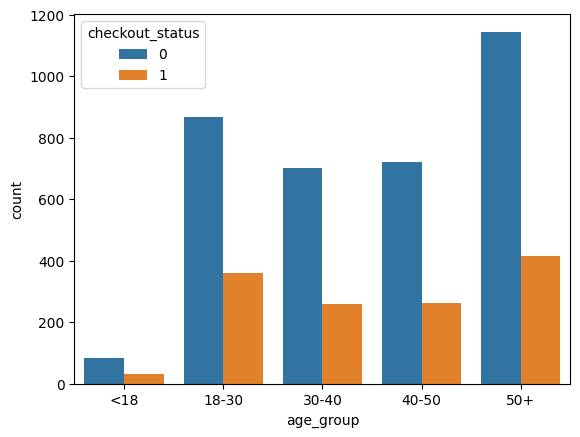

In [ ]:
# Comparing the checkout status by age group
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 40, 50, float('inf')], labels=['<18', '18-30', '30-40', '40-50', '50+'])
sns.countplot(data=df, x='age_group', hue='checkout_status')
plt.show()

In [ ]:
# from above, 50+ age people check out most

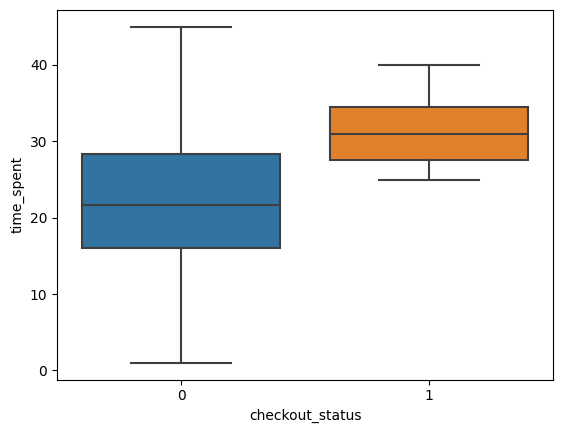

In [ ]:
# Comparing the checkout status by time spent
sns.boxplot(data=df, x='checkout_status', y='time_spent')
plt.show()

In [ ]:
# from above, people spent around 30 mins checkout most.

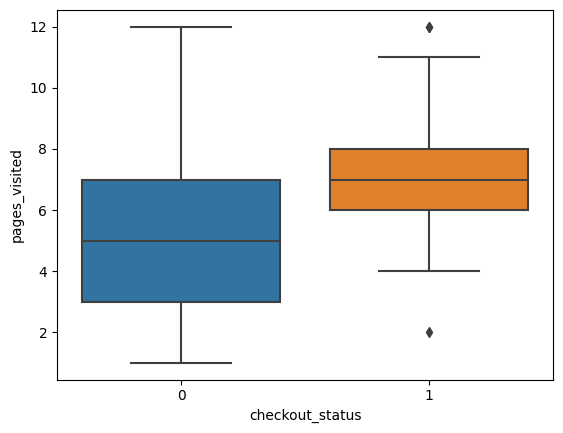

In [ ]:
# Comparing the checkout status by pages visited
sns.boxplot(data=df, x='checkout_status', y='pages_visited')
plt.show()

In [ ]:
#from above, people visit 7 pages checkout most.

In [ ]:
# let's see the check out rate, instead of check out amount.
df['checkout_status'] = df['checkout_status'].astype(int)
df['checkout_rate'] = df.groupby('userID')['checkout_status'].transform('mean')

In [ ]:
# merge the check out rate
df_with_checkout_rate = df.merge(checkout_rate, on='userID', suffixes=('', '_checkout_rate'))

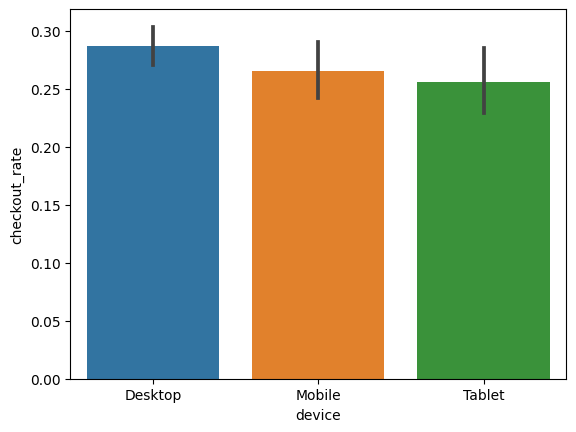

In [ ]:
# Comparing the checkout rate by device type
sns.barplot(data=df, x='device', y='checkout_rate')
plt.show()

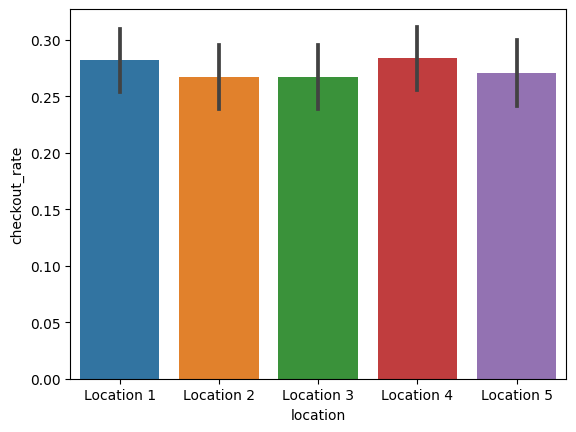

In [ ]:
# Comparing the checkout rate by location
sns.barplot(data=df, x='location', y='checkout_rate')
plt.show()

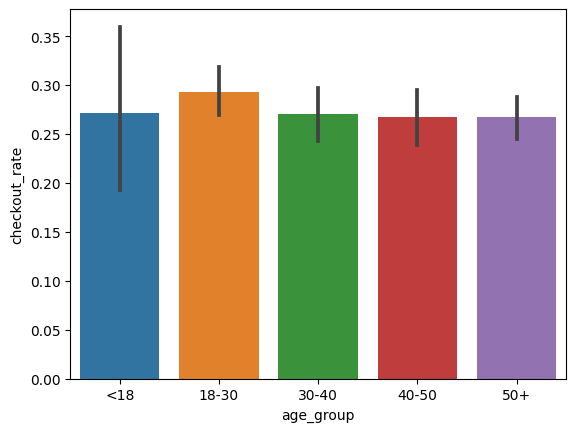

In [ ]:
# Comparing the checkout rate by age group
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 40, 50, float('inf')], labels=['<18', '18-30', '30-40', '40-50', '50+'])
sns.barplot(data=df, x='age_group', y='checkout_rate')
plt.show()

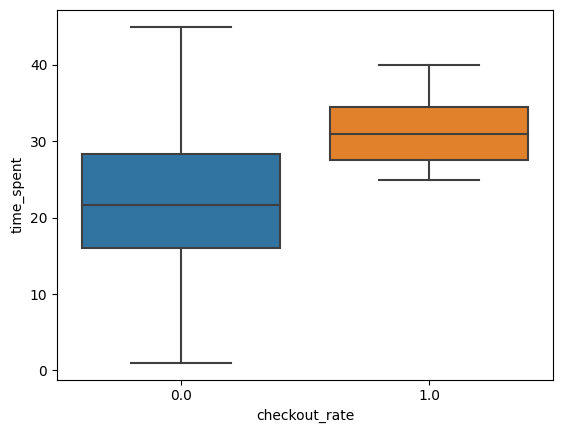

In [ ]:
# Comparing the checkout rate by time spent
sns.boxplot(data=df, x='checkout_rate', y='time_spent')
plt.show()

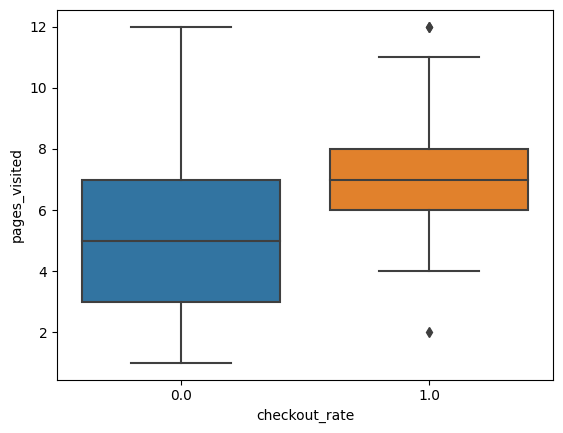

In [ ]:
# Comparing the checkout rate by pages visited
sns.boxplot(data=df, x='checkout_rate', y='pages_visited')
plt.show()

In [ ]:
sns.boxplot(data=df, x='checkout_rate', y='cart_value')
plt.show()

NameError: name 'sns' is not defined

In [ ]:
#FOR Q1:
# based on the analysis, we can draw the conclusions :
#(1) people using the desktop have the higher check out rate, while those using tablet seems to have the lowest.
#(2) the location 1 & 4 are most likely to check out.
#(3) people who spend around 30 mins visiting the website are most likely to check out.
#(4) people have higher probility to check out when they visit around 7 pages.

#FOR Q2:
# (1) Handling missing values:
#By removing the rows with missing values, we ensure that the analysis is conducted on complete and reliable data.
#(2)  converting data types:
#The 'device' and 'location' columns were converted to categorical variables using the astype('category') method. This conversion allows for better handling and representation of these variables in the analysis.
# (3) Feature engineering:
#A new feature, 'checkout_rate', was created to represent the checkout rate for each user. This allows for a user-level analysis of the checkout rate.

#FOR Q3:
# Recommendations to the product team:
#(1) Since users on desktop devices tend to have a higher checkout rate compared to mobile and tablet users.
# The product team should consider optimizing the checkout experience for mobile and tablet devices to reduce barriers for those users.
#(2) Users from location 1 and 4 might have a higher checkout rate. 
#So the team should launch more marketing strategies on those location to trigger their demand.
#(3) Users who spend around 30 mins on the website and visit around 7 pages have a higher likelihood of checking out.
# So the team should aim to enhance user engagement and provide a seamless browsing experience.
# and also can put up a reminder of 'checking out' when users have spent 30 mins browseing the website or have visited 7 pages.